# CS-EJ3211 Machine Learning with Pyhton 

## Round 1 - Components of Machine Learning


<img src="../../data/R1_ComponentsML/AMLProblem.png" alt="Drawing" style="width: 600px;"/>

Many machine learning (ML) problems and methods consist of three components: 

1. **Data points** as the basic (atomic) unit of information. Data points are characterized by **features**, which are properties that can be measured (or computed) easily. Besides features, data points are often associated with specific **labels** that represent some higher-level information or quantity of interest. In contrast to features, labels are difficult to acquire, and much of machine learning is concerned with developing methods that allow predicting the labels of a data point based on its features.  

2. A **hypothesis space** (also referred to as an ML model) consisting of computationally feasible predictor functions.

3. A **loss function** that is used to assess the quality of a particular predictor function. 

## Learning Goals

* Learn to make useful definitions for what data points (examples, samples), features, and labels are in different real-life applications. 
* Learn how to represent data as NumPy arrays, which are used to represent vectors and matrices in Python.   
* Learn to use ("toy") datasets provided by the Python library `scikit-learn`. 
* Learn about the concept of hypothesis spaces. 
* Learn how to fit (linear) predictions functions to data. 

This notebook contains several student tasks requiring you to write a few lines of Python code to solve small problems. In particular, you have to fill in the gaps marked as **Student Task**.

<b><center><font size=4>Additional material</font></center></b>

<b><font size=4>Videos</font></b>

* [Data](https://youtu.be/WWYRH3x7_5M), [Hypothesis Space](https://youtu.be/CDcRfak1Mh4), [Hypothesis Space of Linear Models](https://youtu.be/Mch5hmhVuiA), [Hypothesis Space of Decision Trees](https://youtu.be/0FmaLfjAaRE), [Hypothesis Space of Deep Learning](https://youtu.be/im8mweIrpAM),[Loss Functions](https://www.youtube.com/watch?v=Uv9lihDfsBs&t=4s)

<b><font size=4>Tutorials</font></b>

* components of ML can be found under [this link](https://arxiv.org/pdf/1910.12387.pdf) 

* Python library `numpy` can be found under [this link](https://hackernoon.com/introduction-to-numpy-1-an-absolute-beginners-guide-to-machine-learning-and-data-science-5d87f13f0d51).

* "Learn the Basics" and "Data Science Tutorial" sections from [this link](https://www.learnpython.org/en/).

* a quick refresher for basic properties of matrices can be found under [this link](http://math.mit.edu/~gs/linearalgebra/linearalgebra5_1-3.pdf)
and [this link](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470549094.app1)

* mathematical notation [this link](https://en.wikipedia.org/wiki/List_of_mathematical_symbols)



## Data (Features and labels)

In machine learning, the goal is to make computers learn mathematical models that accurately predict or offer insight into the properties of real-world objects, events, etc.. These objects are represented by **data points**, which are the basic units of information in our machine learning problem. Each data point is characterized by a list of **features** $\left(x_1, x_2, \ldots, x_n \right)$, which are easily measurable or otherwise obtainable properties of the data point. Data points might also be associated with different **labels**, which represent higher-level information that is of predictive interest. Data that contains both the features and labels of data points is commonly called **labeled data**.

ML methods can roughly be divided into **supervised**- and **unsupervised** methods. Supervised methods are used in problems where we wish to use the features of data points to predict their corresponding labels $y$. These methods use examples of labeled data to learn a predictive model of the label based on the features of data points, hence the name. The fitted model can then be used to predict the labels of unlabeled data points.

In contrast to supervised methods, unsupervised methods learn about the structure of the data using only the features of data points. Examples of unsupervised ML methods are clustering algorithms, which aim to identify different clusters of data points in the dataset.

### Representing data as Matrices and Vectors
<a id="Q1"></a>

In order to simplify the mathematical presentation as well as the technical implementation of machine learning methods, it is useful to represent data using [vectors and matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)). 

In the vectorized representation, the features of a data point are stored in a **feature vector** $\mathbf{x}$, which is a column vector

\begin{equation}
    \mathbf{x}= \begin{pmatrix}
                    x_{1} \\ x_{2} \\ \vdots \\ x_{n}
                \end{pmatrix} \in \mathbb{R}^n
\end{equation}

where $x_i, 1 \leq i \leq n,$ denotes the value of the $i$:th feature of the data point. Furthermore, we assume that the data points are indexed and denote the feature vector of the $i$:th data point by $\mathbf{x}^{(i)}, 1 \leq i \leq m$.

It is customary to store the features of the dataset in a **feature matrix** $\mathbf{X}$, in which the $i$:th row contains the feature vector of the $i$:th data point:

\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                  \mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \ldots & \mathbf{x}^{(m)}
               \end{pmatrix}^T 
             = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}
               \end{pmatrix} \in \mathbb{R}^{m \times n}
\end{equation}

If the data is labeled, we store the labels of the data points in a separate **label vector** $\mathbf{y}$, which is a column vector where the $i$:th row contains the label of the $i$:th data point:

\begin{equation}
  \mathbf{y} = \begin{pmatrix}
                  y_1 \\ y_2 \\ \vdots \\ y_m 
               \end{pmatrix} \in \mathbb{R}^m
\end{equation}

#### Example: Benefits of the vectorized representation

Let us use an example to show the notational benefit of representing the data using vectors and matrices.

Let  

\begin{equation}
    h(x_1, x_2, \ldots, x_n) = \sum_{i=1}^m w_i x_i = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n
\end{equation}

be a linear predictor function that we aim to use to predict a numeric label for the data points $\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots, \mathbf{x}^{( m)}$. By using the feature vector $\mathbf{x}$ and another column vector $\mathbf{w} \in \mathbb{R}^n$ containing the weights, we can write the predictor $h(\mathbf{x})$ concisely as

\begin{equation}
    h(\mathbf{x}) = \mathbf{w}^T \mathbf{x} = \mathbf{x}^T \mathbf{w}.
\end{equation}.

Now, we could use this function calculate the predicted label $\hat{y} = h(\mathbf{x})$ for each data point separately. However, the feature matrix $\mathbf{X}$ provides us with an even more convenient alternative. By using the rules of matrix multiplication, we can write the vector of predicted values as

\begin{equation}
    \hat{\mathbf{y}} = \begin{pmatrix}
                         \hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \vdots \\ \hat{y}^{(m)}
                       \end{pmatrix} =
                       \begin{pmatrix}
                         h(\mathbf{x}^{(1)}) \\ h(\mathbf{x}^{(2)}) \\ \vdots \\ h(\mathbf{x}^{(m)})
                       \end{pmatrix} = 
                       \begin{pmatrix}
                         (\mathbf{x}^{(1)})^T \mathbf{w} \\ (\mathbf{x}^{(2)})^T \mathbf{w} \\ \vdots \\ (\mathbf{x}^{(m)})^T \mathbf{w}
                       \end{pmatrix} = 
                       \begin{pmatrix}
                         (\mathbf{x}^{(1)})^T \\ (\mathbf{x}^{(2)})^T \\ \vdots \\ (\mathbf{x}^{(m)})^T
                       \end{pmatrix} \mathbf{w}= 
                       \mathbf{X} \mathbf{w}.
\end{equation}



#### Summary of mathematical notation:

- $m$ - number of data points
- $n$ - number of features
- $\mathbf{X}$       - upper-case bold letters denote a matrix
- $\mathbf{X}^{T}$   - transpose of matrix (or vector) 
- $\mathbf{x}$       - lower-case bold letters denote a vector   
- $x_{i}$            - $i$:th entry of vector $\mathbf{x}$
- $\mathbf{x}^{(i)}$ - feature vector of $i$:th data point
- $x_{j}^{(i)}$      - $j$:th feature of $i$:th data point
- $\mathbb{R}$       - real numbers
- $\mathbb{R}^{n}$   - [real coordinate space](https://en.wikipedia.org/wiki/Real_coordinate_space) consisting of length-$n$ lists of real numbers 
- $\mathbb{R}^{m \times n}$ - matrices with $m$ rows and $n$ columns of real-valued numbers$

### Vectors and matrices in NumPy

In NumPy, vectors and matrices (and higher dimensional tensors) are represented by `ndarray`:s. An `ndarray` object is an n-dimensional array of shape $(d_1,d_2,...,d_n)$, where $d_i$ is the length of the $i$th dimension of the array. 

For example, we can represent the label vector $\mathbf{y}$ as an `ndarray` of shape $(n,1)$ and the feature matrix $\mathbf{X}$ as an `ndarray` of shape $(m,n)$.

### Example: Features and Labels 

Let us illustrate the main ML terminology using a concrete example. Imagine that we want to build a model for classifying songs according to their genre (such as "Pop", "Blues" or "Hip-Hop"). In this case, the **data points** are songs, with each song corresponding to a specific data point. The data points (=songs) are characterized by the **features** of the data point, which in this case are the city where the song was produced, the length of the song's lyrics, its tempo, and the power spectrum of the audio signal. The quantity of interest or **label** is in this case the genre to which the song belongs to. 

In order to train a machine learning model to predict the genre (class) of different songs (data points), we need a labeled training dataset consisting of songs for which the genre is known. This dataset can then be used as the input to a supervised ML algorithm, which learns a predictor $h(\mathbf{x}) = \hat{\mathbf{y}}$ that maps the features of a song to a predicted label.

<img src="../../data/R1_ComponentsML/FeaturesLabels.jpg" alt="Drawing" style="width: 1000px;"/>


### Loading datasets in NumPy and Pandas

On this course, you will learn to solve machine learning problems using ML models implemented in the Python library **scikit-learn**, which is built on the scientific computing package **NumPy**. Hence, you will first have to load data into NumPy arrays before you can apply ML methods from scikit-learn.

In this section, you will learn how to load a dataset using NumPy and Pandas and how to define the feature matrix and label vector that are used in many scikit-learn models. As an example, we will use a small dataset consisting of the weights and benchpress results of students at Aalto university, and consider the weight as the feature and the benchpress result as the label of the data points.

<a id='npDataDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Loading a dataset with NumPy.  
    
The code snippet below loads the benchpress dataset using the NumPy function `loadtxt` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)).
    
`loadtxt` can be used to load multiple different text-based file formats. Since our data is in `.csv` (comma-separated values format, we will set the parameter `delimiter=','` in the `loadtxt` function. Furthermore, the first row of the benchpress data contains the variable names, so we will set the parameter `skiprows=1` in order to skip this row when loading the data.
</div>

In [17]:
import numpy as np

path = "../../data/R1_ComponentsML/benchpress.csv"  # Define file path
bp_data = np.loadtxt(path, delimiter=',', skiprows=1)  # Load data as an ndarray

X = bp_data[:,0].reshape(-1,1)  # Define the feature matrix X
y = bp_data[:,1]  # Define the label vector y

# Print the first five values of X and y
print(f"First five values of X (weights of students):\n {X[:5,:]} \n")
print(f"First five values of y (bp results of students):\n {y[:5]}")

First five values of X (weights of students):
 [[68.72700594]
 [97.53571532]
 [86.59969709]
 [79.93292421]
 [57.80093202]] 

First five values of y (bp results of students):
 [ 45.82560525 111.9390433   80.88996529  75.52398007  37.67579885]


<a id='pdDataDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Loading a dataset with Pandas.  
    
The code snippet below loads the benchpress dataset using the function `read_csv` in Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)). The function creates a Pandas [DataFrame](https://www.google.com/search?q=pandas+dataframe&oq=pandas+dataframe&aqs=chrome.0.69i59j35i39j0l5j69i60.3267j0j7&sourceid=chrome&ie=UTF-8) based on the data, and uses the top row to define the column names.
    
In order to define the feature matrix `X` and label vector `y`, we first select the corresponding data from the dataframe, and then convert it into `ndarray`:s by using the `.to_numpy()` function.
</div>

In [18]:
import pandas as pd

path = "../../data/R1_ComponentsML/benchpress.csv"  # Define the file path
df = pd.read_csv(path)  # Load the data as a Pandas DataFrame

X = df['Bodyweight'].to_numpy().reshape(-1,1)  # Define the feature matrix
y = df['Benchpress'].to_numpy()  # Define the label vector

# Print first five values of X and y
print(f"First five values of X (weights of students):\n {X[:5,:]} \n")
print(f"First five values of y (bp results of students):\n {y[:5]}")

First five values of X (weights of students):
 [[68.72700594]
 [97.53571532]
 [86.59969709]
 [79.93292421]
 [57.80093202]] 

First five values of y (bp results of students):
 [ 45.82560525 111.9390433   80.88996529  75.52398007  37.67579885]


### Datasets in Scikit-Learn

When solving real-life ML problems, you will have to import your own data into the Python environment by using, for example, the methods shown above. However, the Python library `scikit-learn` also comes with functions for loading a few standard datasets, which can be useful for testing different ML methods or honing your ML skills. These datasets include some small built-in [toy datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets), such as the [iris](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset) and [digits](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset) datasets for classification and the [boston house prices](https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset) and [linnerrud](https://scikit-learn.org/stable/datasets/index.html#linnerrud-dataset) datasets for regression, but also larger [real world datasets](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets) that are downloaded only when calling a fetching function.

The scikit-learn datasets are stored in a [`bunch` data type](https://pypi.org/project/bunch/) containing multiple key-value pairs, similar to the ones in a Python `dictionary`. The main difference between the two data types is that the `bunch` type enables accessing values through attributes named in accordance with the keys (i.e. `bunch['key'] == bunch.key`).

All scikit-learn datasets include a feature matrix with key `'data'` and a target vector with the key `'target'`, as well as a description of the dataset with the key `DESCR`. Also, the `Bunch` objects might contain other items as well, such as `feature names` and `target_names` containing the names of the features and targets of the data points respectively. 

You can find more information about the datasets in `scikit-learn` here: https://scikit-learn.org/stable/datasets/index.html

More datasets can be found here:
https://archive.ics.uci.edu/ml/index.php
https://www.kaggle.com/datasets

Let us now take a closer look at some of these `scikit-learn` datasets and try to identify features and labels for these datasets.

<a id='pdDataDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Loading and exploring a toy dataset in scikit-learn.
    
The 
**["Digits" dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)** contains images of hand-written digits. This dataset can be used for testing a classification method to [recognize digits from hand-written images](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#recognizing-hand-written-digits).
    
We begin by importing the `sklearn.datasets` module and loading the digits dataset using the function `datasets.load_digits()`. After this we print the keys of the key-value pairs in the `Bunch` object, in order to see what items the object contains.
</div>

In [19]:
from sklearn import datasets  # Import toy datasets

# Load the digits dataset into the bunch object "digits"
digits = datasets.load_digits() 

# Print the keys of all (key,value) pairs contained in digits
print(f"Key-value pairs of 'digits':\n {digits.keys()}\n") 

Key-value pairs of 'digits':
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])



<div class=" alert alert-info">
    
To obtain more information on the dataset, we can print the dataset's description contained in the `DESCR` attribute.
</div>

In [20]:
# Print out a short description of the dataset (only first 660 characters are used)
print(digits.DESCR[:660])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.



<div class=" alert alert-info">

We can see from the description that the data points are characterized by 8x8 pixel images of hand-written digits. Each pixel of an image is represented by an integer $0,\ldots,16$ with $0$ corresponding to a black pixel, and $16$ to a white pixel. 

Thus, each data point is characterized by 64 features denoting the integer values of the image pixels. Moreover, each data point has a label: an integer in the range $0,\ldots,9$, corresponding to the written digit in the image.
    
<div/>

In [21]:
# Print number of datapoints
print(f"Number of datapoints: {digits.data.shape[0]}")

# Print the number of features used to characterize a single data point
print(f"\nNumber of features used to characterize a data point: {digits.data.shape[1]}")

# Print number of different classes (number of different values the label can take on) 
print(f"\nNumber of different classes (different values the label can take on): {digits.target_names}")

Number of datapoints: 1797

Number of features used to characterize a data point: 64

Number of different classes (different values the label can take on): [0 1 2 3 4 5 6 7 8 9]


<div class=" alert alert-info">

The `Bunch` object of the digits dataset contains both a `.images` and a `.data` attribute containing `ndarrays` with pixel data. Let us print the shape of the attributes and the first image/data point from the respective arrays to find out how the attributes differ.
    
<div/>

In [22]:
# Digits.images returns an np.array of shape(m,8,8), which represent
# m different images each having 8x8 pixels with grayscale value in the range 0..16.
print(f"Shape of digits.images : {digits.images.shape}")
print(f"First image :\n {digits.images[0,:,:]}\n")

# Digits.data returns an np.array of shape (m,64), which represent
# m different images each represented by 64 numbers that are the 
# grayscale values of the image pixels 
print(f"Shape of digits.data : {digits.data.shape}")
print(f"First data point in 'data' :\n {digits.data[0,:]}")

Shape of digits.images : (1797, 8, 8)
First image :
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Shape of digits.data : (1797, 64)
First data point in 'data' :
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<div class=" alert alert-info">

We can see that the arrays in the two attributes contain the same data, with the only difference being that the data points are shaped as 8x8 images in `.images` whereas they are 1-dimensional arrays in `.data`. This is easily verified by observing that the pixel values in the first image/data point are identical in both attributes.
    
Finally, let us visualize a part of the dataset by plotting the first 100 images of size 8x8 pixels using the function `plt.imshow()` from `matplotlib.pyplot`:
<div/>

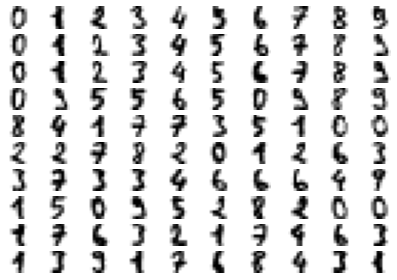

In [23]:
import matplotlib.pyplot as plt  # Import matplotlib library for plotting

fig, axes = plt.subplots(10, 10)  # Create an array of subplots, 10 rows and 10 columns
axes_flat = axes.flatten()  # Collapse 10 x 10 array into a 1-dimensional array of 100 elements

for i, ax in enumerate(axes_flat):  # Iterate over array of subplots 
    ax.imshow(digits.images[i], cmap='gray_r')  # For i-th subplot, show the image of the i-th handwritten digit  
    
plt.setp(axes_flat, xticks=[], yticks=[], frame_on=False) # Remove ticks and frame in all subplots
plt.tight_layout(h_pad=0.5, w_pad=0.01)  # Reduce whitspaces between plots
plt.show()

### Real-World (Large) Datasets

In addition to small datasets it is possible to fetch larger datasets using the library `scikit-learn`. These datasets can, for example, be useful for benchmarking the performance of ML methods.

<a id='rwDataDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Loading and exploring a real-world dataset in scikit-learn.  
    
The code snippet below loads the **Labelled Faces in the Wild** (LFW) face recognition dataset in scikit-learn. The dataset is a collection of JPEG pictures of famous people collected over the internet (read more [here](https://scikit-learn.org/stable/datasets/index.html#the-labeled-faces-in-the-wild-face-recognition-dataset)). 
The dataset can be used to test methods for face verification or [face recognition](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#faces-recognition-example-using-eigenfaces-and-svms) classification problems.
    
We begin by importing the function `fetch_lfw_people` from the `sklearn.datasets` and use this function to download a part of the LFW dataset.
</div>

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people # load data with sklearn.datasets 

# load the part of dataset with labeled images
# use only persons with at least 20 images in the dataset, resize each picture by 0.4 ratio
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4) 

# Print the keys of all (key,value) pairs in the lfw_people 
print(f"Dataset contains:\n {lfw_people.keys()}")

# Print number of datapoints
print(f"\nNumber of datapoints: {lfw_people.data.shape[0]}")

# Print the number of features used to charactize a data point
print(f"\nNumber of features: {lfw_people.data.shape[1]}")

# Print label or category names of the first 10 data points 
print(f"\nLabels:\n {lfw_people.target_names[:10]}")

Dataset contains:
 dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

Number of datapoints: 3023

Number of features: 1850

Labels:
 ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem']


<div class=" alert alert-info">

Next, we will again use `plt.imshow()` to plot an example image from the dataset and print the corresponding person's true name. Would you have identified him yourself?
<div/>

Person in image: George W Bush


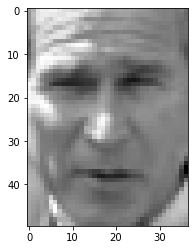

In [25]:
plt.imshow(lfw_people.images[10], cmap='gray')  # Plot the 10th image from the dataset
label_nr = lfw_people.target[10]  # Get the label nr. of the 10th image
print(f"Person in image: {lfw_people.target_names[label_nr]}")  # Print the name corresponding to the label nr.
plt.show()

<b><center><font size=3>Features vs Labels</font></center></b>

The **["Linnerud" dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)** contains physiological parameters (Weight, Waist, and Puls) and exercise data (Chins, Situps, and Jumps) for 20 athletes. We can model this as a machine learning problem by considering data points representing athletes.

In the dataset description, the exercise data is referred to as features, while the physiological parameters are defined as the labels of datapoints (athletes). However, in practice, one can freely choose the quantity of interest (labels). 

For example, suppose we are interested in predicting the number of jumps for different athletes based on their physiological features. In this case, we define the jumps as the label and the weight, waist, and puls as the features. We can then train an ML model on these features and labels to obtain a predictor that predicts the number of jumps based on the physiological features.

<a id='pdDataDemo'></a>
<div class=" alert alert-warning">
    <b>Student task.</b> Loading the Linnerud dataset.  
    
Your task is to load the Linnerud dataset as a `Bunch` object using the function `datasets.load_linnerud()`. Store the object in a variable named `linnerud`. Also, store the feature names in the variable `feature_names` and the target names in the variable `target_names`. The feature- and target names can be accessed via the `.feature_names` and `.target_names` attributes of the `Bunch` object respectively.
</div>

In [26]:
### STUDENT TASK ###
# Load the linnerud dataset into the bunch object "linnerud"
# linnerud = ...
# feature_names = ...
# target_names = ...
### BEGIN SOLUTION
linnerud = datasets.load_linnerud() 
feature_names = linnerud.feature_names
target_names = linnerud.target_names
### END SOLUTION

# Print features names
print(f"\nFeatures: {feature_names}")

# Print labels names
print(f"\nLabels: {target_names}")


Features: ['Chins', 'Situps', 'Jumps']

Labels: ['Weight', 'Waist', 'Pulse']


In [27]:
# Perform some sanity checks on the solutions
assert len(feature_names) == 3, "The number of feature names is wrong!"
assert len(target_names) == 3, "The number of target names is wrong!"

print("Sanity checks passed!")

### BEGIN HIDDEN TESTS
t_feature_names = linnerud.feature_names
t_target_names = linnerud.target_names
assert feature_names == t_feature_names, "The feature names are wrong!"
assert target_names == t_target_names, "The target names are wrong!"
### END HIDDEN TESTS

Sanity checks passed!


<a id='pdDataDemo'></a>
<div class=" alert alert-warning">
    <b>Student task.</b> Exploring the feature matrix.  
    
This task tests your knowledge on the structure of the feature matrix $\mathbf{X}$ and array indexing in NumPy. 
    
The code snippet first loads the physical features in the Linnerud dataset into the feature matrix `X`. After this, your task is to
    
- Store a vector containing the values of the first feature of the feature matrix in the variable `a`.
    
- Store the feature vector of the 10th data point in the variable `b`
    
- Store a matrix containing the 2nd and 3rd features of data points $10, 11, \ldots, 14$ in the variable `c`.
    
**Hint:** Remember that indexing starts from zero in Python! For example, the first data point is stored in the row with index 0, etc.
</div>

In [28]:
# Define the feature matrix as the physical features in the Linnerud data
X = linnerud.target

### STUDENT TASK ###
# a = ...
# b = ...
# c = ...
### BEGIN SOLUTION
a = X[:,0]
b = X[9,:]
c = X[9:14, 1:]
### END SOLUTION

print(f"Shape of X: {X.shape}")
print(f"Shape of a: {a.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of c: {c.shape}")

Shape of X: (20, 3)
Shape of a: (20,)
Shape of b: (3,)
Shape of c: (5, 2)


In [29]:
# Perform some sanity checks on the solution
assert a.shape == (20,), "The shape of a is incorrect!"
assert b.shape == (3,), "The shape of b is incorrect!"
assert c.shape == (5, 2), "The shape of c is incorrect!"

print("Sanity checks passed!")

### BEGIN HIDDEN TESTS
t_a = X[:,0]
t_b = X[9,:]
t_c = X[9:14, 1:]
np.testing.assert_equal(a, t_a, err_msg="a is incorrect!")
np.testing.assert_equal(b, t_b, err_msg="b is incorrect!")
np.testing.assert_equal(c, t_c, err_msg="c is incorrect!")
### END HIDDEN TESTS

Sanity checks passed!


## Visualizing Data

Before considering how machine learning models learn from data, we will briefly examine how we can visualize data using the [Matplotlib](https://matplotlib.org/) library in Python. Visual exploration of the dataset is often a beneficial to perform before applying ML methods since it can aid in identifying relationships between the variables in the data.

The [scatterplot](https://en.wikipedia.org/wiki/Scatter_plot) is a particularly useful tool for visualizing a dataset containing discrete data points. The scatterplot visualizes the data with respect to two different variables and can be used to assess the relationship between a single feature and the label or the relationship between two distinct features. Another useful plot type is the [histogram](https://en.wikipedia.org/wiki/Histogram), which is often used for visualizing the sample distribution of the data with respect to a single numerical variable.

In the demos below, we show how to create these types of plots with Matplotlib in Python. In addition, we present the Scatter Matrix as a useful high-level tool in the Pandas package that can be used to create histograms and scatterplots of multiple variables at once. 

<a id='plotpdDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Plotting a scatterplot with Matplotlib.  
    
In the code snippet below, we plot a scatterplot of the weight and waist measurements of the 20 athletes in the Linnerud dataset, using the `.scatter()` function in Matplotlib.
    
You can consult the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) of `.scatter()` for information on different options available for plotting, as well as further examples that show to create more sophisticated scatterplots. 
</div>

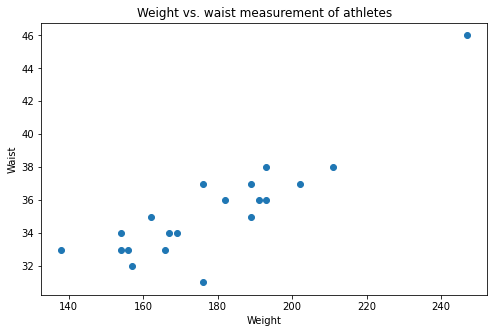

In [30]:
# Load Linnerud data and select the physical attributes as the features
linnerud = datasets.load_linnerud()
X = linnerud['target']
feature_names = linnerud.target_names

# Extract the vector of weights (first column) and waist measurements (second column)
weight = X[:,0]
waist = X[:,1]

plt.figure(figsize=(8,5))  # Set size of figure
plt.scatter(weight, waist)  # Make a scatterplot of the weights vs. waists
plt.title("Weight vs. waist measurement of athletes")  # Set title
plt.xlabel(feature_names[0])  # Set label to x-axis
plt.ylabel(feature_names[1])  # Set label to y-axis
plt.show()

<a id='plotpdDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Plotting a histogram with Matplotlib.  
    
In the code snippet below, we plot a histogram of the weights of the 20 athletes in the Linnerud dataset.
    
You can consult the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) of `.hist()` for information on different options available for plotting, as well as further examples that show how to create more sophisticated histograms.
</div>

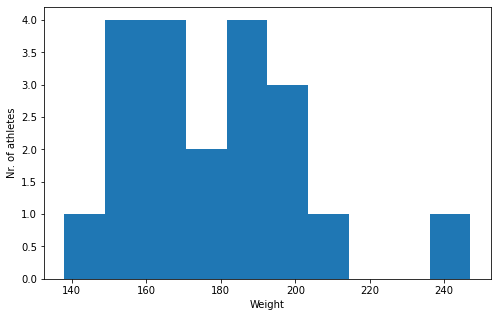

In [31]:
plt.figure(figsize=(8,5))  # Set size of figure
plt.hist(weight)  # Plot a histogram of the weights
plt.xlabel("Weight")  # Set label to x-axis
plt.ylabel("Nr. of athletes")  # Set label to y-axis
plt.show()

When exploring your dataset, you will most likely want to make multiple scatterplots and histograms using many different variables. This might be tedious to do yourself, so it is fortunate that functions for this exist in many different libraries. Below, we will use such a function from the Pandas library.

<a id='plotpdDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Plotting a scatter matrix with Pandas.  
    
The `.scatter_matrix()` function in the `pandas.plotting` package is a very convenient tool for plotting scatterplots and histograms for multiple variables at once. The function takes as input a Pandas `DataFrame` object and plots a scatter matrix, which is an `(n_features, n_features)` grid of plots with histograms in the diagonal cells and scatterplots in the others. The scatterplot in the $i$:th row and $j$:th column is a scatterplot with $j$:th feature on the x-axis and the $i$:th feature on the y-axis.
    
In the code snippet below, we first create a `DataFrame` with the physiological features as the data and the feature names as the column names. Then we use the `.scatter_matrix()` function to create the scatter matrix of this data.
    
You can consult the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) of `.scatter_matrix()` for information on additional options for plotting.
</div>

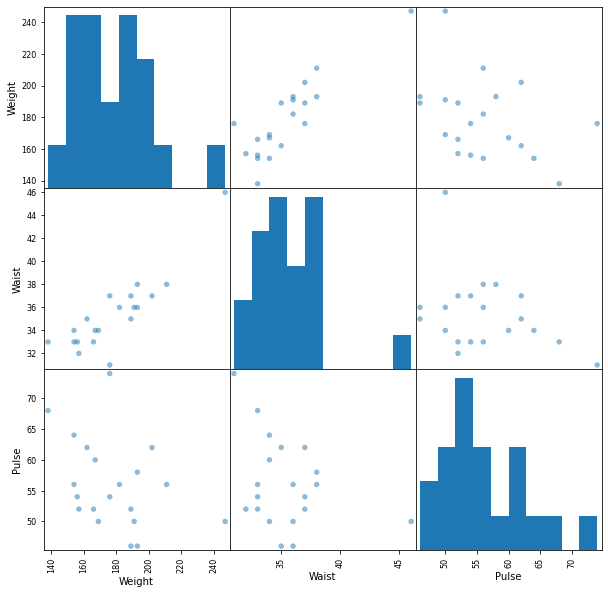

In [32]:
# Create pandas DataFrame containing the physiological features
physical_df = pd.DataFrame(X, columns=feature_names)

# Plot a Pandas scatter matrix of the physical features
pd.plotting.scatter_matrix(physical_df, figsize=(10,10), s=120)
plt.show()

# Hypothesis Space 

In order to predict or estimate the label y of a data point, we apply a predictor map $h(x)$ to the features $x$ of the data point. Given finite computational resources (such as time or memory), we must restrict the space of possible predictor maps to a "small" subset which we refer to as the hypothesis space. 

The `Linnerud dataset` consists of data points that represent athletes doing some exercise. We might be interested in how specific properties (or features) of a person affect their performance. Let us try to predict the number of chin-ups that an athlete can do.  

We want to find a good predictor $h(x)$ that takes as input the body weight $x$ and outputs the predicted number of chin-ups $\hat{y}=h(x)$ for the corresponding athlete. In general, the prediction is not perfect resuling in a non-zero prediction error $\hat{y} - y = h(x) - y$. ML methods aim at finding a predictor map $h(\cdot)$ such that the prediction error is small on average.  

Choosing a good predictor $h(x)$ from the space of all possible functions $h(\cdot): \mathbb{R} \rightarrow \mathbb{R}$ is challenging since there are [**so many** of these functions](https://en.wikipedia.org/wiki/Function_of_a_real_variable#Cardinality_of_sets_of_functions_of_a_real_variable). Therefore, we usually restrict the space of candidate predictor functions to a subset $\mathcal{H}$ of all possible predictor functions, called the **hypothesis space**. The functions in the hypothesis space are characterized by a set of **model parameters** that define the exact form of the predictor function.

By selecting, for example, a **linear model** without an intercept term, we choose to restrict ourselves to the family of linear functions of the form

\begin{equation}
    h(x) = w \cdot x. 
\end{equation} 

The set of all of such functions obtained for different choices for $w$,

\begin{equation}
    \mathcal{H} = \lbrace h(x) = w \cdot x \; | \; w \in \mathbb{R}\rbrace, 
\end{equation}

constitutes the hypothesis space of linear predictors. 
Each function of this hypothesis space is characterized by a single model parameter $w \in \mathbb{R}$. Once we specify this number (or weight), we can compute the function value $h^{(w)}(x)$ for any possible feature value $x$. 

Larger hypothesis spaces containing more complex functions typically involve a larger set of model parameters. The figure below shows the optimal predictor for four polynomial hypothesis spaces, as well as the form of the predictor functions in the respective spaces. We can see that whereas the first-degree polynomials in the hypothesis space $\mathcal{H}^{(2)}$ are parametrized by the linear term $w_1$ and intercept $w_0$, the third-degree polynomials in $H^{(4)}$ are parametrized by a larger collection of parameters $(w_0, w_1, w_2, w_3)$. 

<img src="../../data/R1_ComponentsML/Hspace.jpg" alt="Drawing" style="width: 1000px;"/>

<a id='HypothesisDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Hypothesis Space of Linear Predictor Functions.  
    
The code snippet below creates a scatterplot of the body weight and number of chin-ups of the athletes in the `linnerud` dataset, and plots 
some of the predictor functions $h(x)=w \cdot x$ in the linear hypothesis space using a finite number of choices for the parameter $w \in \mathbb{R}$. 
</div>

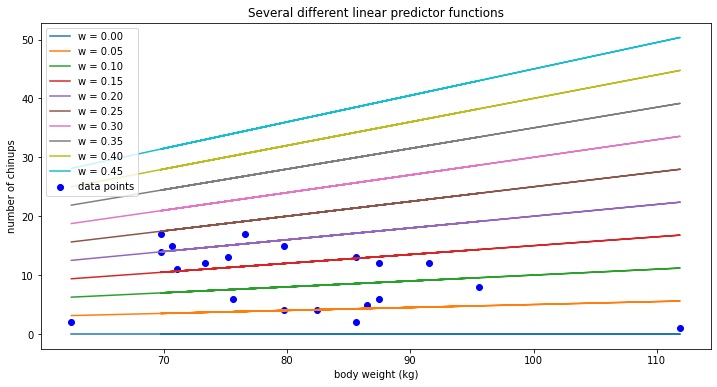

In [33]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

linnerud = datasets.load_linnerud()  # Load the linnerud dataset
linnerud_exercises = linnerud['data']  # Store the exercise results
linnerud_stats = linnerud['target']  # Store the physical stats of the athletes

# Use the weight (in Lbs) of each athlete as features 
x = linnerud_stats[:,0] 
x = x.reshape(-1,1)  # convert to numpy array of shape (m,1)
x = x*0.453 # convert Lbs to Kg

# Use the number of chin ups performed by each athlete as label 
y = linnerud_exercises[:,0] 

# Define the coefficients w for the different predictors (0,0.05,...,0.45)
coefficients = np.linspace(0, 0.45, 10)

# Plot the datapoints and generated predictor functions from the linear hypothesis space
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Create Figure and Axes object

# Make a scatterplot of the data
axes.scatter(x, y, color='blue', label="data points") 

# Plot the predictor function for each regression coefficient w in 'coefficients'
for w in coefficients: 
    y_pred = w*x  # Calculate the predictor function
    label = f"w = {w:.2f}"  # Format the label for the legend
    axes.plot(x, y_pred, label=label)  # Plot the predictor function

axes.set_title('Several different linear predictor functions')  # Set plot title
axes.set_xlabel('body weight (kg)')  # Set x-axis label
axes.set_ylabel('number of chinups')  # Set y-axis label
axes.legend(loc='upper left')  # Set location of the legend to show in upper left corner
plt.show()

# Learning by Minimizing Loss

A key idea underlying ML is to choose predictor functions $h(x)$ based on how well they fit historic or training data. For linear predictors, of the form $h(x)=w \cdot x$, the search of a good predictor is reduced to the search for a good choice for the weight $w \in \mathbb{R}$. 

To search for a good predictor function $h$ we need to quantify (measure) the prediction error $\hat{y} - y$. In principle, we can use any measure that assigns a loss (error) to a given pair of label value $y$ and prediction $\hat{y}$. Thus, much like the hypothesis space, also the loss function is a **design choice**. 

In general, it is difficult to come up with widely applicable guidelines for which loss function to choose. The properties of a loss function affect not only the accuracy of the resulting predictor map but also the computational complexity of the resulting methods. 

In general, we are free to define the loss function to best suit the statistical properties of the data and computational resources at hand. However, for certain classes of machine learning problems some useful choices for the loss functions have crystalized. For example, if the labels of data points take on numeric values, a widely used choice for the loss function is the squared error loss $(y - \hat{y})^{2}$. 

Note that in order to compute the loss, we need to know the true label value $y$ of a data point. Thus, computing the loss requires labeled data points. One option to aquire labeled data is from historic recordings or experiments. Assume we have some labeled data points $(x^{(1)},y^{(1)}),\ldots,(x^{(m)},y^{(m)})$ consisting of $m$ data points. The $i$th data point has the feature $x^{(i)}$ and the true label $y^{(i)}$. 

We have now all the tools to find the best linear predictor $h(x) = w \cdot x$ by minimizing the empirical risk or average squared error loss 

\begin{equation}
(1/m) \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^{2} = (1/m) \sum_{i=1}^{m} (y^{(i)} - w \cdot x^{(i)})^{2}. 
\end{equation}

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Fitting a Linear Model to the Linnerud data.  
    
In the code snippet below, we use the `LinearRegression` class in sklearn to fit a linear regression model without intercept to the Linnerud data.

The `LinearRegression` class in `sklearn` implements a least-squares linear regression model that minimizes the mean-squared error when fitted to the data. Similarily to other supervised models in scikit-learn, the `LinearRegression` model is fitted to the data `X, y` by calling the function `LinearRegression.fit(X, y)`. 
    
After fitting the model, the optimal weights (in this case there is only one weight $w$) of the linear model are stored in the `.coef_` attribute of the `LinearRegression` object. By calling `LinearRegression.predict(X)` after fitting the model, the `LinearRegression` object uses the optimal weights stored in `.coef_` to calculate the predictions $\hat{y}^{(i)} = w_{\rm opt} x^{(i)}, \; i=1,\ldots,m$.
    
After fitting the model, we will plot the data points along with the predictions $\hat{y}^{(i)} = w_{\rm opt} x^{(i)}$ and the prediction errors $y^{(i)} - \hat{y}^{(i)} = y^{(i)} - w_{\rm opt} x^{(i)}$ as red bars. 

</div>

Optimal weight w = 0.1114352858702688


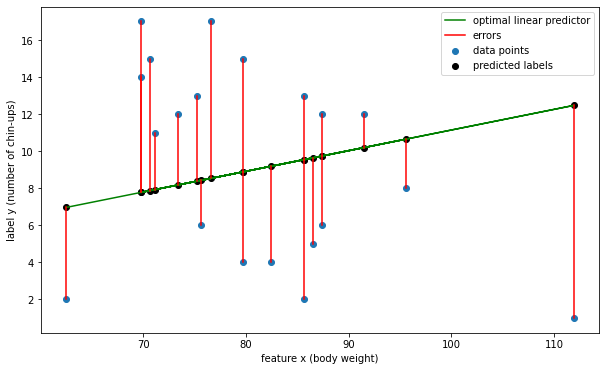

In [42]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression(fit_intercept=False)  # Initialize Linear Regression model
reg.fit(x, y)  # Fit the linear regression model using "x" and "y" variables
y_pred = reg.predict(x)  # Make predictions based on the fitted model
w_opt = reg.coef_[0]  # Get the optimal regression coefficient

# Print weight of the optimal predictor 
print("Optimal weight w =", w_opt)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Create Figure and Axis objects and set figure size
axes.scatter(x, y, label='data points')  # Make a scatterplot of the weights vs. the nr. of chin-ups
axes.scatter(x, y_pred, label='predicted labels', color='black')  # Plot the predicted labels
axes.plot(x, y_pred, color='green', label='optimal linear predictor')  # Plot the linear predictor

# Plot errors
axes.plot((x[0], x[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(x)-1):  # Loop through range length of x - 1
    lineXdata = (x[i+1], x[i+1])  # Make tuples with same X
    lineYdata = (y[i+1], y_pred[i+1])  # Make tuples with different y's
    axes.plot(lineXdata, lineYdata, color='red')  # Add the red lines to the plot to indicate error distance from our predicted regression model

axes.legend(loc='upper right')  # Add legend to the upper right corner
axes.set_xlabel("feature x (body weight)")  # Set label for x-axis
axes.set_ylabel("label y (number of chin-ups)")  # Set label for y-axis
plt.show()

### Adding an Intercept Term 

A simple but useful extension of the linear prediction functions used above is to add an intercept term. Specifically, we consider predictor functions of the form 

\begin{equation}
h(x) = w \cdot x + b, 
\end{equation}

which contain a weight $w$ and an intercept term $b$. Thus, the hypothesis space of the linear regression model with an intercept is defined as

\begin{equation}
    \mathcal{H} = \lbrace h(x) = w \cdot x + b \; | \; w, b \in \mathbb{R} \rbrace.
\end{equation}

Observe that this model has two model parameters - $w$ and $b$. Thus, the model is fitted by minimizing the average squared error of $h(x)$ with respect to both $w$ and $b$.

The name "intercept term" stems from the fact that it is geometrically the value at which the regression line intercepts (crosses) the y-axis. By including the intercept term in the linear model, we can fit any line to the data. Thus, it is in practice always preferable to include the intercept term, except for rare cases where we know in advance that the regression line must pass through the origin. 

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Fitting a Linear Model without and with an intercept. 

Fit two linear regression models to the Linnerud data, one with an intercept term and one without one. The inclusion of the intercept term is controlled by the parameter `fit_intercept` (`LinearRegression(fit_intercept=...)`), which takes a boolean value (`True` or `False`) that indicates whether the intercept is included.
    
In addition, find the optimal weight $w_{\rm opt}$ for the model without intercept and store it in the variable `w_opt`, and find the optimal weight and intercept for the model with an intercept and store these in the variables `w_opt_intercept` and `intercept` respectively.
</div>

In [39]:
### STUDENT TASK ###
# Linear Regression model without an intercept
# reg = ...
# reg.xxx(...)
# w_opt = ...
#
# Linear Regression model with an intercept term 
# reg_intercept = ...
# reg_intercept.xxx(...)
# w_opt_intercept = ...
# intercept = ...
#
# remove the line raise NotImplementedError() before testing your solution and submitting code
### BEGIN SOLUTION
reg = LinearRegression(fit_intercept=False)
reg = reg.fit(x, y)
w_opt = reg.coef_[0]
reg_intercept = LinearRegression(fit_intercept=True) 
reg_intercept = reg_intercept.fit(x, y) 
w_opt_intercept = reg_intercept.coef_[0]
intercept = reg_intercept.intercept_
### END SOLUTION

# Print parameters of the optimal predictors
print(f"model without intercept: optimal weight w_opt = {w_opt}")
print(f"model with intercept: optimal weight w_opt_intercept = {w_opt_intercept} and intercept = {intercept}")

model without intercept: optimal weight w_opt = 0.1114352858702688
model with intercept: optimal weight w_opt_intercept = -0.18418114215330775 and intercept = 24.351322650827086


In [36]:
# Perform sanity check on the results
assert w_opt < 1, "w_opt value is wrong"
assert w_opt_intercept < 50, "w_opt_intercept value is wrong"
assert intercept > -400, "intercept value is wrong"

print('Sanity checks passed!')

### BEGIN HIDDEN TESTS
np.testing.assert_allclose(w_opt, 0.111, atol=1e-2, err_msg="w_opt value is wrong")
np.testing.assert_allclose(w_opt_intercept, -0.184, atol=1e-2, err_msg="w_opt_intercept value is wrong")
np.testing.assert_allclose(intercept, 24.351, atol=1e-2, err_msg="intercept value is wrong")
### END HIDDEN TESTS

Sanity checks passed!


Next, we will plot a figure of the linnerud data and the optimal predictors found in the previous task.

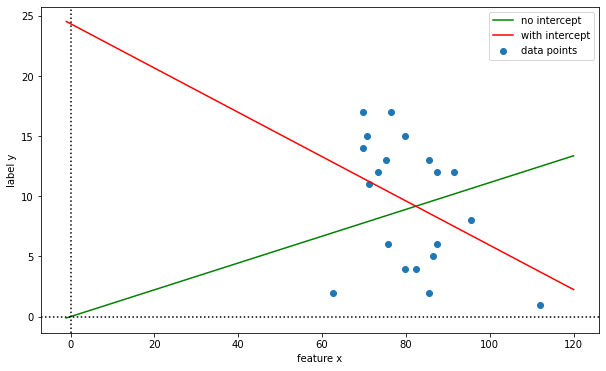

In [37]:
# Create a grid of test feature values  
x_grid = np.linspace(-1, 120, num=100).reshape(-1,1) 
# Compute predictions from linear regression model without intercept term 
y_pred = reg.predict(x_grid) 
# Compute predictions on test feature values using linear regression model with intercept term 
y_pred_intercept = reg_intercept.predict(x_grid)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Initialize subplots and get "fig" and "axes" variables
axes.scatter(x, y, label='data points')  # Create a scatter plot of the chin-up data
axes.plot(x_grid, y_pred, color='green', label='no intercept')  # Add a line to the plot
axes.plot(x_grid, y_pred_intercept, color='red', label='with intercept')  # Add a line to the plot

axes.legend() # Add a legend to the plot
axes.set_xlabel("feature x")  # Add x-axis label to the plot 
axes.set_ylabel("label y")  # Add y-axis label to the plot
axes.axhline(y=0, color='k', linestyle=':')  # Add a dotted line to the plot
axes.axvline(x=0, color='k', linestyle=':')  # Add a dotted line to the plot
plt.show()

Note that the predictor function obtained without intercept term passes through origin, while the predictor function obtained with the intercept term crosses y-axis at the value of the intercept term.

Note that the optimal weight for the linear predictor without intercept is positive, which suggests a positive correlation between feature value and label value (higher feature value hints at higher label value). In contract, the optimal weight obtained for the linear predictor with an intercept term is negative. This negative weight would suggest a negative correlation between feature value and label value (higher feature value hints at lower label value). 

Since the training error obtained from the linear predictor with intercept term is smaller, it is more plausible to have a negative correlation between feature value and label value. This agrees with the intuition that having a higher body weight typically implies a smaller number of achievable chin-ups. 